# Extraindo as Letras da Discografia de Harry Styles

Harry Edward Styles é um cantor, compositor e ator britânico que iniciou sua carreira em 2010 como concorrente solo no programa britânico *The X Factor*. Embora tenha sido eliminado, ele retornou para integrar a *boyband* One Direction, que rapidamente se tornou uma das bandas mais bem-sucedidas de todos os tempos, até entrar em um hiato em 2016. Desde então, Styles alcançou grande sucesso como artista solo, conquistando prêmios importantes, como dois *Brit Awards*, quatro *Grammy Awards*, um *Ivor Novello Award* e um *American Music Award*. Ele também expandiu sua atuação para o cinema, estreando no filme de guerra *Dunkirk*, de Christopher Nolan, em 2017. Além de sua carreira musical e cinematográfica, Styles é conhecido por seu estilo único e inovador, sendo o primeiro homem a aparecer sozinho na capa da revista Vogue.

A música de Styles foi descrita como uma combinação de *soft rock*, *pop* e *rock*, com elementos de *folk* e *britpop*. Ele foi influenciado pelos artistas que ouviu durante sua infância, como Pink Floyd, The Rolling Stones, The Beatles e Fleetwood Mac, além das composições de Harry Nilsson. Styles também citou Freddie Mercury, Elvis Presley e Paul McCartney como influências, mencionando Shania Twain como sua principal inspiração tanto na música quanto na moda. Seu álbum favorito é *Astral Weeks*, do músico norte-irlandês Van Morrison, que ele descreveu como "completamente perfeito". Além disso, considera o álbum *At Last!* de Etta James como "perfeito". Ao ouvir o álbum *The Dark Side of the Moon*, do Pink Floyd, quando criança, ele disse que "não conseguia realmente entender, mas me lembro de pensar — isso é muito legal". O álbum *Blue*, de 1971, de Joni Mitchell, inspirou Styles a entrar em contato com o instrumentista de dulcimer do *disco*, com quem trabalhou em *Fine Line*.

Mais informações no link: https://pt.wikipedia.org/wiki/Harry_Styles

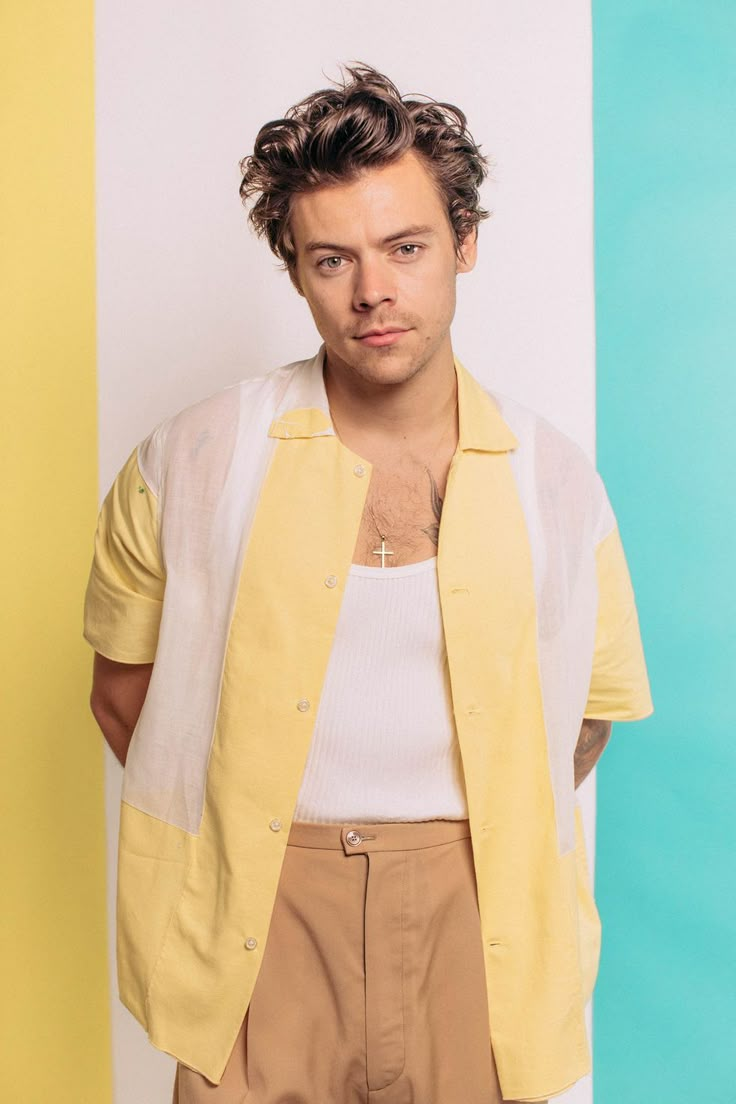

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

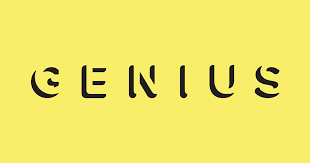

In [ ]:
# Importando as Bibliotecas
import os
import pandas as pd
import json
import pandas as pd
import json
import re
import os
import numpy as np
from os import path
from langdetect import detect
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import sqlite3
import csv

# Uso da API Genius
import lyricsgenius

# Chamada de Requisição
api_key = YOUR API_KEY
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Harry Styles", max_songs=38)

Searching for songs by Harry Styles...

Song 1: "Sign of the Times"
Song 2: "As It Was"
Song 3: "Watermelon Sugar"
Song 4: "Falling"
Song 5: "Adore You"
Song 6: "Fine Line"
Song 7: "Matilda"
Song 8: "Medicine"
Song 9: "Kiwi"
Song 10: "Cherry"
Song 11: "Lights Up"
Song 12: "Golden"
Song 13: "Two Ghosts"
Song 14: "Sweet Creature"
Song 15: "She"
Song 16: "Sunflower, Vol. 6"
Song 17: "Little Freak"
Song 18: "To Be So Lonely"
Song 19: "Late Night Talking"
Song 20: "Boyfriends"
Song 21: "Keep Driving"
Song 22: "Love Of My Life"
Song 23: "Daylight"
Song 24: "From the Dining Table"
Song 25: "Cinema"
Song 26: "Music for a Sushi Restaurant"
Song 27: "Grapejuice"
Song 28: "Only Angel"
Song 29: "Meet Me in the Hallway"
Song 30: "Ever Since New York"
Song 31: "Woman"
Song 32: "Satellite"
Song 33: "Girl Crush"
Song 34: "Carolina"
Song 35: "Canyon Moon"
Song 36: "Oh Anna"
Song 37: "Treat People With Kindness"
Song 38: "Daydreaming"

Reached user-specified song limit (38).
Done. Found 38 songs.


<div class="alert alert-block alert-info"
     <b> Ao todo em sua discografia, Harry Styles possui 35 músicas, logo limitei para buscar 38 faixas musicais para não pesar o algoritmo e as requisições da API não cairem com facilidade. </b>
</div>

In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Lyrics_HarryStyles.json already exists. Overwrite?
(y/n): y
Wrote Lyrics_HarryStyles.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Arquivos Gerados/Lyrics_HarryStyles.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df0 = pd.DataFrame(data['songs'])
df0.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'lyrics_placeholder_reason', 'recording_location', 'release_date',
       'current_user_metadata', 'song_art_primary_color',
       'song_art_secondary_color', 'song_art_text_color', 'album',
       'custom_performances', 'description_annotation',
       'lyrics_marked_complete_by', 'lyrics_marked_staff_approved_by', 'medi

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df = df0[['title','lyrics','release_date',]]

# Classificando as músicas pelo álbum
album_list=[]
for i in range(len(df0['album'])):
    try:
        album_list.append(df0['album'][i]['name'])
    except:
        album_list.append(None)
        continue
df['Album']=album_list

# Eliminando as linhas 7, 32 e 35 que não pertencem aos álbuns oficiais do Harry
df = df.drop(index=[7, 32, 35])

# Reseta o índice, se necessário
df.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df['release_date'] = pd.to_datetime(df['release_date'])

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df['release_year'] = df['release_date'].dt.year

# Exibindo o dataframe resultante
df

C:\Users\Ryan\AppData\Local\Temp\ipykernel_6680\2008158767.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Album']=album_list


,title,lyrics,release_date,Album,release_year
0,Sign of the Times,328 ContributorsTranslationsNederlandsEspañolP...,2017-04-07,Harry Styles,2017
1,As It Was,213 ContributorsTranslationsTürkçeEspañolPortu...,2022-04-01,Harry’s House,2022
2,Watermelon Sugar,169 ContributorsTranslationsDeutschTürkçeEspañ...,2019-11-16,Fine Line,2019
3,Falling,174 ContributorsTranslationsDeutschTürkçeEspañ...,2019-12-13,Fine Line,2019
4,Adore You,124 ContributorsTranslationsTürkçeEspañolPortu...,2019-12-06,Fine Line,2019
5,Fine Line,122 ContributorsTranslationsTürkçePortuguêsFra...,2019-12-13,Fine Line,2019
6,Matilda,107 ContributorsTranslationsTürkçeEspañolPortu...,2022-05-20,Harry’s House,2022
7,Kiwi,158 ContributorsTranslationsEspañolPortuguês日本...,2017-05-12,Harry Styles,2017
8,Cherry,120 ContributorsTranslationsDeutschTürkçeEspañ...,2019-12-13,Fine Line,2019
9,Lights Up,121 ContributorsTranslationsDeutschEspañolPort...,2019-10-11,Fine Line,2019


In [ ]:
# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df.loc[:, 'lyrics'] = df.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df.loc[:, 'lyrics'] = df.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df.loc[:, 'lyrics'] = df.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df.loc[:, 'lyrics'] = df.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df['Word Count'] = df['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df["lyrics"] = df["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df.to_csv("HarryStylesLyrics.csv", index=False)

In [ ]:
# Criando um banco de dados de teste
conn = sqlite3.connect('HarryStyles.db')

# Salvando no banco de dados
df.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Sign of the Times',
  'contributorstranslationsnederlandsespa olportugu spolskinorsk bokm riksm fran aisdeutschsign times lyrics  just stop crying sign times welcome final show hope wearing best clothes bribe door look pretty good here really good  never learn before always stuck running from bullets bullet never learn before always stuck running from your bullets bullet  just stop crying sign times gotta away here gotta away here just stop crying alright they told near gotta away here  just stop crying time life breaking atmosphere things look pretty good here remember everything alright meet somewhere somewhere away here might also like  never learn before always stuck running from bullets bullets never learn before always stuck running from bullets bullets  just stop crying sign times gotta away here gotta away here stop crying baby alright they told near gotta away here  never learn before always stuck running from your bullets bullets never learn before always stuck running fro